# Capstone Report Video Game Sales
<b>Genesis Taylor</b>

In this report I will discuss the dataset Video Game Sales which can be found <a href="https://www.kaggle.com/gregorut/videogamesales" target="_blank" rel="nofollow">here</a> or <a href="http://bit.ly/vgsales" target="_blank" rel="nofollow">here</a>. I will analyze the files to form questions, find answers, and create a list of future questions and analyzing that I would like to do to the dataset.

First, I must import all the necessary modules and the data set itself. After doing that, I want to get a basic look at the data, this means checking the number of entries and their types. From there, I can figure out how I'm going to query the data. 

In [100]:
#import the neccessary modules

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import scipy.stats as stats

In [101]:
#load csv file data set
vgs = pd.read_csv('http://bit.ly/vgsales' , sep=',')

In [102]:
#check Video Game Sales information
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


<b>Before doing any further querying, I realized that the data's last update was 10/26/2016. In order to more accurately look at trends and results, I decided to delete any data from the years 2016-2020. </b>

In [103]:
vgs = vgs[(vgs[['Year']] != 2016).all(axis=1)]
vgs = vgs[(vgs[['Year']] != 2017).all(axis=1)]
vgs = vgs[(vgs[['Year']] != 2018).all(axis=1)]
vgs = vgs[(vgs[['Year']] != 2019).all(axis=1)]
vgs = vgs[(vgs[['Year']] != 2020).all(axis=1)]

In [104]:
#check Video Game Sales information
vgs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16250 non-null int64
Name            16250 non-null object
Platform        16250 non-null object
Year            15979 non-null float64
Genre           16250 non-null object
Publisher       16194 non-null object
NA_Sales        16250 non-null float64
EU_Sales        16250 non-null float64
JP_Sales        16250 non-null float64
Other_Sales     16250 non-null float64
Global_Sales    16250 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


<h2>Questions</h2>

<b>Upon getting a basic look at the dataset, I notice that there are sales for different regions of the world, genres, platforms, and publishers. While there is a lot of information here, I am curious to look at a few areas to see how sales are in different areas of the world.  I have formed a few questions that I would like to find an answer to by querying the dataset. </b>

<b>Questions:</b>
1. How are the sales per year in each region?
    
2. What are the top 5 genres per sales by region?

3. As a follow-up to question 2, are these results the same in each region? If not, how are the publisher sales within those differing regions, and how to they compare to genre sales?


<h3>Sales per Year in Each Region</h3>

<b>How are the sales per year in each region?</b>

Looking at the overall sales by region, I notice that North America had the most sales of all the regions. Europe followed close behind, while Japan and the other regions had almost similar sales results.


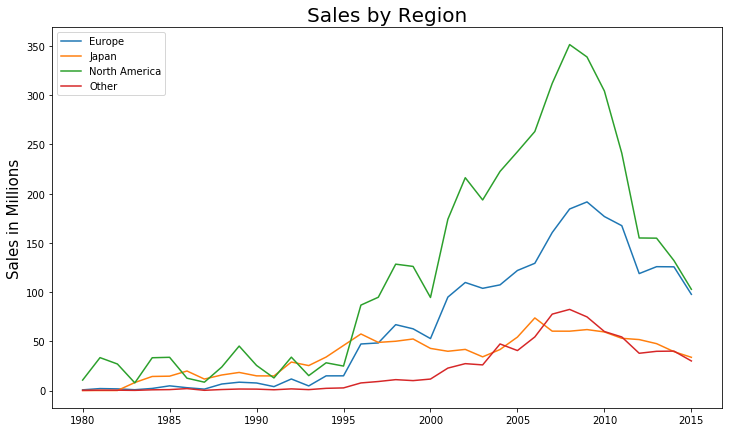

In [105]:
#Sales per year by region visualized into a line graph

all_sales = vgs.groupby('Year').agg({'NA_Sales': np.sum, 'EU_Sales': np.sum, 'JP_Sales': np.sum, 'Other_Sales': np.sum})


f,ax=plt.subplots(1,1,figsize=(12,7))
plt.plot(all_sales.EU_Sales, label='Europe')
plt.plot(all_sales.JP_Sales, label='Japan')
plt.plot(all_sales.NA_Sales, label='North America')
plt.plot(all_sales.Other_Sales, label='Other')
plt.legend(loc='upper left')
plt.title('Sales by Region', size=20)
plt.ylabel('Sales in Millions', size=15)
plt.show()

Seeing the difference in overall sales, I wanted to compare the sales across different entities to see how they differed. I decided at this point to look at the sales in the top 5 genres in each region.

<h3>Top 5 Genres Per Sales by Region</h3>

<b>What are the top 5 genres per sales by region? Are these results the same in each region?</b>

As the results show below, Europe and Other region’s top 5 were Action, Sports, Shooter, Racing, and Misc., Japan and North America differed. Japan’s top 5 were Role-Playing, Action, Sports, Platform, and Misc. North America’s top 5 were Action, Sports, Shooter, Platform, and Misc.   

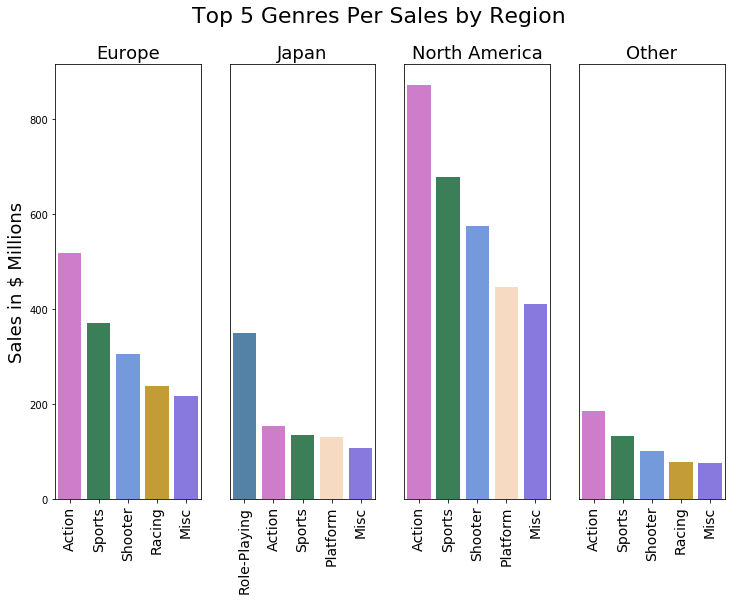

In [106]:
def turn_off_labels(ax, first=True):
    if first == False:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)
        y_axis = ax.axes.get_yaxis()
        y_axis.set_visible(False)
    else:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)
        
colors =  {'Action':"orchid", 'Misc':"mediumslateblue", 'Racing':"goldenrod", 
           'Shooter':"cornflowerblue", 'Role-Playing':"steelblue", 'Platform':"peachpuff", 'Sports':"seagreen"}

EU = vgs.pivot_table('EU_Sales', columns='Genre', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:5]
EU_genres = EU.index

JP = vgs.pivot_table('JP_Sales', columns='Genre', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
JP_genres = JP.index

NA = vgs.pivot_table('NA_Sales', columns='Genre', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:5]
NA_genres = NA.index

Other = vgs.pivot_table('Other_Sales', columns='Genre', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:5]
Other_genres = Other.index

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = EU_genres, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=EU_genres, y=EU['EU_Sales'], palette=colors)
plt.title('Europe', size=18)
plt.ylabel('Sales in $ Millions', size=18)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = JP_genres, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=JP_genres, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = NA_genres, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=NA_genres, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other_genres, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_genres, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 5 Genres Per Sales by Region', size=22)
plt.show();



<b>As a follow-up to question 2, if the sales are not the same, how are the Publisher sales within those differing regions, and how do they compare to genre sales within those same regions?</b> 

<h3>North America & Japan's Top 5 Publishers<h/3>

<b>First, I would like to look at the top 5 publishers for both, North America and Japan, and then look at the genre sales for those Publishers. </b>

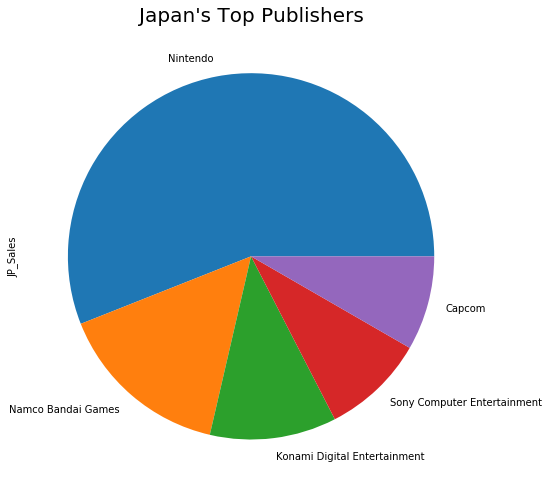

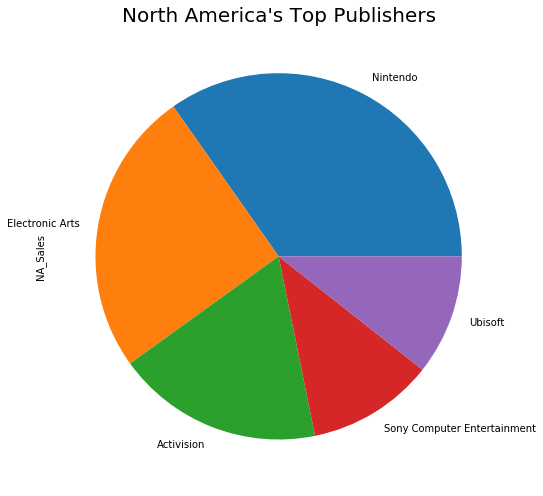

In [107]:
#Japan's Top Publishers
f,ax=plt.subplots(1,1,figsize=(17,7))
vgs.groupby("Publisher")["JP_Sales"].sum().sort_values(ascending=False)[:5].plot.pie()
plt.title("Japan's Top Publishers", size = 20)
plt.tight_layout()

#North America's Top Publishers
f,ax=plt.subplots(1,1,figsize=(17,7))
vgs.groupby("Publisher")["NA_Sales"].sum().sort_values(ascending=False)[:5].plot.pie()
plt.title("North America's Top Publishers", size = 20)
plt.tight_layout()

<b> Looking at the results I have a good idea of who the top publishers are for each region. In Japan, the top publishers are Nintendo, Namco Bandai Games, Konami Digital Entertainment, Sony Computer Entertainment, and Capcom. In North America, the top publishers are Nintendo, Electronic Arts, Activision, Sony Computer Entertainment, and Ubisoft. </b>


<b>Knowing this information, what I want to look at now are the top genres for those publishers and see if there is any correlation with the top 5 genres in these regions. </b>

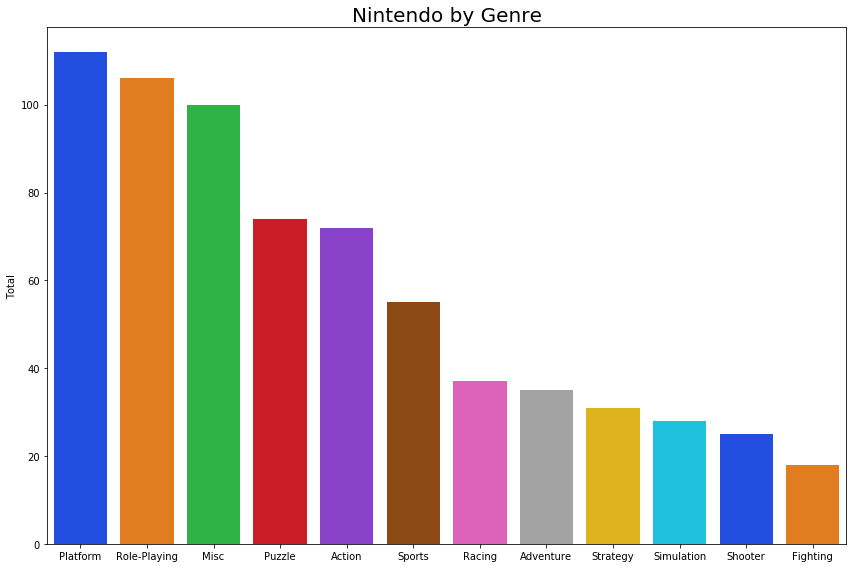

In [108]:
#Nintendo Setup
nt = vgs[vgs.Publisher =='Nintendo']
nt_genre = nt['Genre'].value_counts()

plt.figure(figsize=(12,8))

colors = sns.color_palette("bright")
sns.barplot(nt_genre.index,nt_genre.values, palette=colors)
plt.title('Nintendo by Genre', size = 20)
plt.ylabel('Total')
plt.tight_layout()



<b>Nintendo was a top seller for both North America and Japan. The purpose of this query is to look at the uniqueness from their "Top 5 Genres Per Sales by Region" graphs and compare it to the results above. </b>

<b>The following things were noticed:</b>
1. Platform is Nintendo's highest selling genre. Both North America and Japan had the genre Platform as one of their top 5 sellers.
2. Role-Playing is Nintendo's second highest selling genre. Role-Playing is Japan's highest selling genre. Looking at this I assume that the Japan would be Nintendo's top buyer, however more querying would be needed to confirm this.




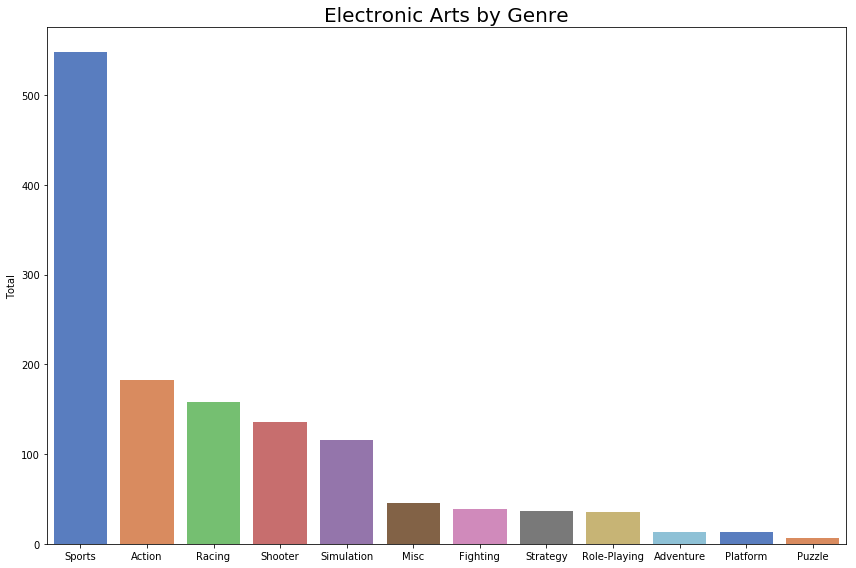

In [109]:

#Electronic Arts Setup
ea = vgs[vgs.Publisher =='Electronic Arts']
ea_genre = ea['Genre'].value_counts()

plt.figure(figsize=(12,8))
colors = sns.color_palette("muted")
sns.barplot(ea_genre.index,ea_genre.values, palette=colors)
plt.title('Electronic Arts by Genre', size = 20)
plt.ylabel('Total')
plt.title('Electronic Arts by Genre', size = 20)
plt.tight_layout()




<b>Electronic Arts had the second highest sales for Publishers in North America. Looking at their Sales by Genre we see that Sports is their highest seller. This isn't unique to North America and neither is their next highest seller. Nothing really stood out her that would help me to better understand the unique sales of Japan and North America. However, their high number of Sports sales might explain the overall high sales of Sports in every region.</b>

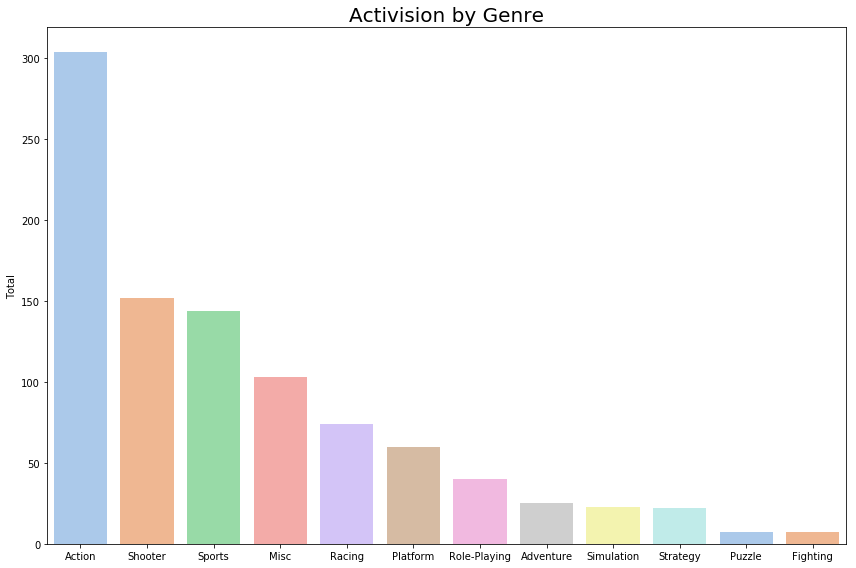

In [110]:
#Activision Setup
av = vgs[vgs.Publisher =='Activision']
av_genre = av['Genre'].value_counts()

plt.figure(figsize=(12,8))
colors = sns.color_palette("pastel")
sns.barplot(av_genre.index,av_genre.values, palette=colors)
plt.title('Activision by Genre', size = 20)
plt.ylabel('Total')
plt.tight_layout()





<b>Activision is North America's 3rd highest Publisher. Like, Electronic Arts, nothing unique to North America really stands out. However, it might help to explain why Action games are so high over all. </b>

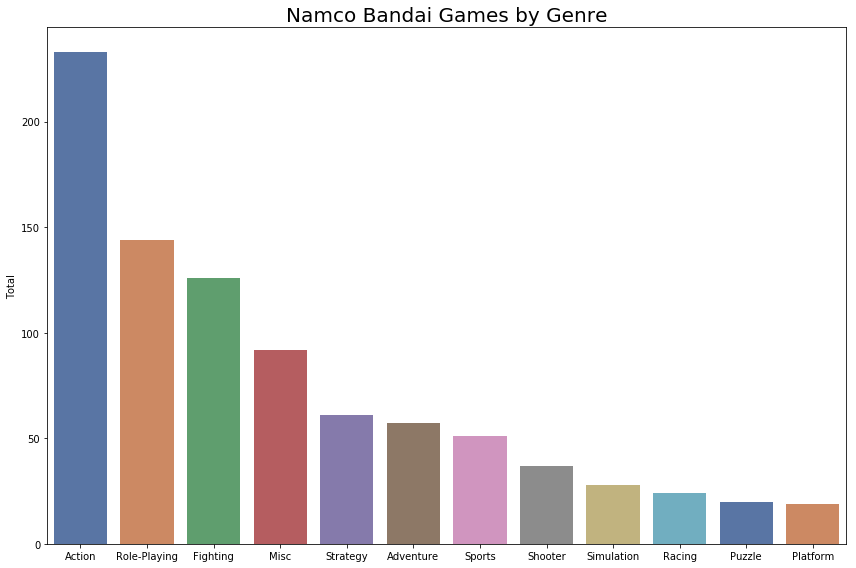

In [111]:
#Namco Bandai Games Setup
nbg = vgs[vgs.Publisher =='Namco Bandai Games']
nbg_genre = nbg['Genre'].value_counts()

plt.figure(figsize=(12,8))
colors = sns.color_palette("deep")
sns.barplot(nbg_genre.index,nbg_genre.values, palette=colors)
plt.title('Namco Bandai Games by Genre', size = 20)
plt.ylabel('Total')
plt.tight_layout()




<b>Like Nintendo, Namco Bandai Game's second highest seller are Role-Playing games. Namco is also Japan's second highest Publisher. This helps to explain Japan's high Role-Playing sales.</b>

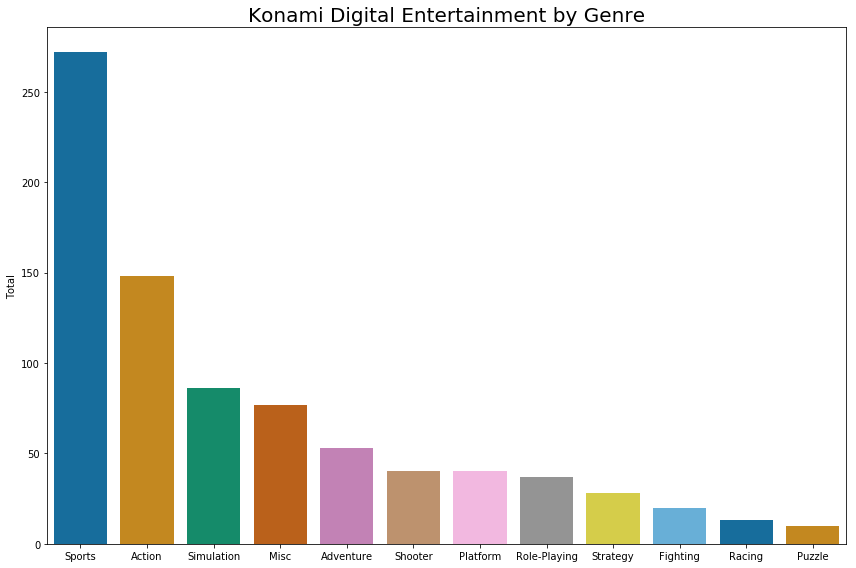

In [112]:
#Konami Digital Entertainment Setup
kde = vgs[vgs.Publisher =='Konami Digital Entertainment']
kde_genre = kde['Genre'].value_counts()

plt.figure(figsize=(12,8))
colors = sns.color_palette("colorblind")
sns.barplot(kde_genre.index,kde_genre.values, palette=colors)
plt.title('Konami Digital Entertainment by Genre', size = 20)
plt.ylabel('Total')
plt.tight_layout()




<b>Konami Digital Entertainment was Japan's third highest seller. Its genre sales have no significant impact on the uniqueness of Japan's genre sales. However, it does help to explain high sports sales overall.</b>

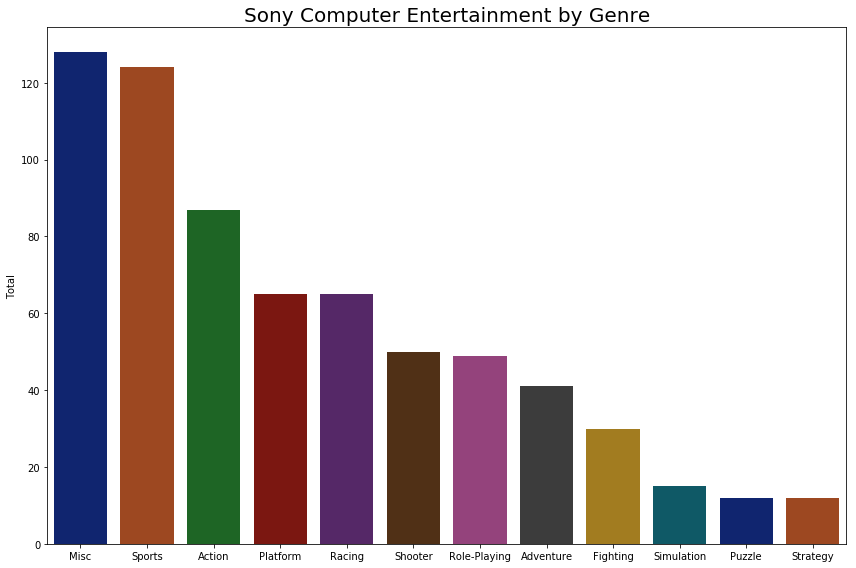

In [113]:
#Sony Computer Entertainment Setup
sce = vgs[vgs.Publisher =='Sony Computer Entertainment']
sce_genre = sce['Genre'].value_counts()

plt.figure(figsize=(12,8))
colors = sns.color_palette("dark")
sns.barplot(sce_genre.index,sce_genre.values, palette=colors)
plt.title('Sony Computer Entertainment by Genre', size = 20)
plt.ylabel('Total')
plt.tight_layout()




<b>Sony Computer Entertainment is North America's third highest Publisher and Japan's fourth highest seller. It explains nothing unique to what I was looking for. </b>

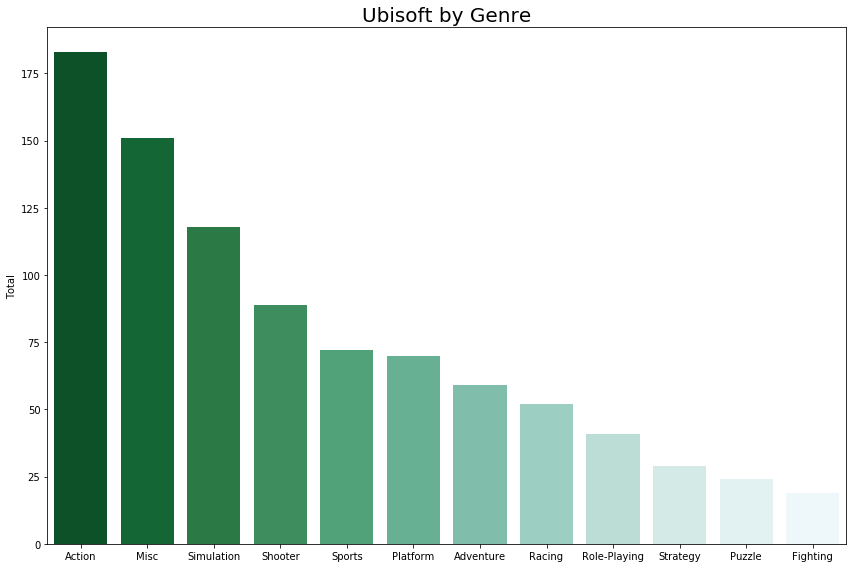

In [114]:
#Ubisoft Setup
ub = vgs[vgs.Publisher =='Ubisoft']
ub_genre = ub['Genre'].value_counts()

plt.figure(figsize=(12,8))
colors = sns.color_palette("BuGn_r", n_colors=12)
sns.barplot(ub_genre.index,ub_genre.values, palette=colors)
plt.title('Ubisoft by Genre', size = 20)
plt.ylabel('Total')
plt.tight_layout()




<b>Ubisoft has no significant comparisons to the current set of questions.  </b>

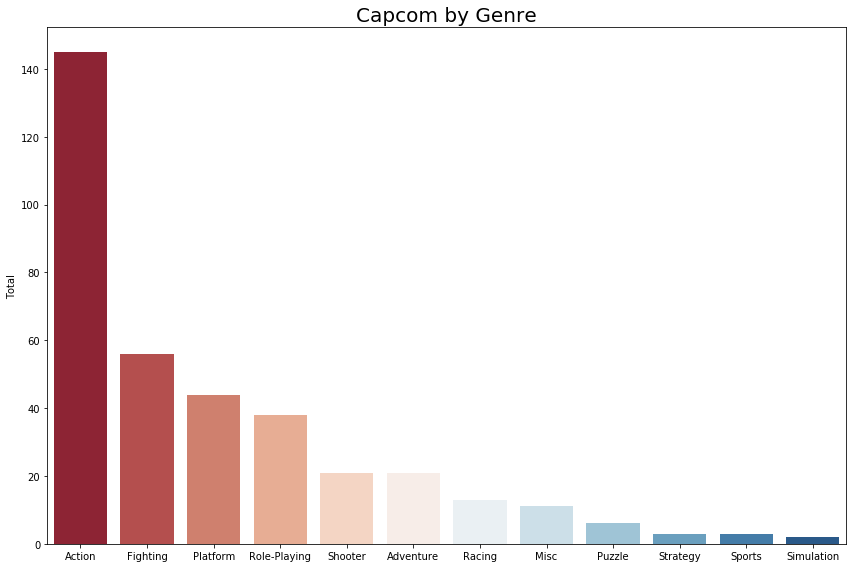

In [115]:
#Capcom
cp = vgs[vgs.Publisher =='Capcom']
cp_genre = cp['Genre'].value_counts()

plt.figure(figsize=(12,8))
colors = sns.color_palette("RdBu", n_colors=12)
sns.barplot(cp_genre.index,cp_genre.values, palette=colors)
plt.title('Capcom by Genre', size = 20)
plt.ylabel('Total')
plt.tight_layout()

<b>Capcom has no significant comparisons to the current set of questions. </b>

<h3>Question 3 Summary:</h3>


The summary of the above data showed me that Nintendo and Namco Bandai Games, Japan's first and second highest publishers has significant sales in Role-Playing. This is Japan's highest selling genre. The correlation between these two publishers and Japan exists among genre sales.


There was also a correlation with Nintendo among both Japan and North America with Platform games. The large amount of sales from Nintendo's Platform games and it being both region's top sellers explains the uniqueness in Platforms being in both of their Top 5 Genre's. 

<h2>Statistics & Probability</h2>

From the above data I noticed that some of the results looked similar so using statisticacl methods, I wanted to check and see if there were any significant differences. 

<h3>Europe Sales vs Other Sales</h3>

Looking at the Top 5 Genres Per Sales by Region results I noticed that European Sales and Other Sales looked similar. They weren't the same but I wondered if their difference was significant. To plot this, I decided to take a sample of the data and perform a t-test and check for the p--value. 

In [116]:
#Created a sample size of 20 entries
vgs20 = vgs.sample(20)


#From the 20, performed a t-test
stats.ttest_ind(vgs20.EU_Sales , vgs20.Other_Sales)

Ttest_indResult(statistic=2.3199580751496245, pvalue=0.025812405921984135)

From the sample size analyzed, I received a p-value that leads me to believe that there may not be a significant difference between the two sales results. 

<h3>Nintendo's Platforms and Role Playing Genres</h3>

When I did the analyzation of specific Publishers and their Genre Sales, I noticed that Platform and Role Playing were extremely high for Nintendo. At that point, I wondered how high. If I were to pick a random game from Nintendo, what would be the probability that I would select a Platform or Role-Playing Game versus any of their other games.

To calculate this, I did a basic probability check.


In [118]:
#Taking the setup for #Nintendo Setup from the Nintendo by Genre section 
#to find the probability that I'd pick a Platform  or Role Playing Game


ntplrpprob =(nt_genre['Role-Playing'] + nt_genre.Platform)/ nt_genre.sum()
ntplrpprobpct = ntplrpprob * 100

print ("The probability of picking a Platform or Role Playing game from the" 
       " Publisher, Nintendo is " + (str(round(ntrpprobpct, 0)) + '%.'))

The probability of picking a Platform or Role Playing game from the Publisher, Nintendo is 31.0%.


<h4>Further Research</h4>

<b>After doing the above queries, I see where further research could be done. 
The following are areas in which I would like to do more research: </b>
    1. Japan seems to be the most unique among the regions. I would like to see how they rank amount Publishers and Platforms.
    2. This notebook looked more so at high sales. What I would like to research are the smaller sellers and hopefully learn some techniques that could help to predict what they could do to improve their sales.
    3. I would like to use this data to predict future sales over all. I'd like to use this data, 1980 -2015, to predict the sales of 2016 and onward (note: I did not use sales from those years because they were not complete.)
    4. Once I have done the predicting with this information, I'd like to compare it to years that have already passed.
    
    
<b>From these points of potential research, the proposal that I have for complete further research is looking at lower performers and doing predictive analytics to help them improve sales. 
</b>